<a href="https://colab.research.google.com/github/avivnark/MACS_5/blob/main/fourierB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequency domain and Fourier transform

In [47]:
import cmath, numpy, scipy
from scipy import fftpack
from scipy.fft import fft
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

## Complex numbers

The imaginary number $i$ is defined as $\sqrt{-1}$. Python can handle complex numbers natively.

In [48]:
numpy.sqrt(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

In [49]:
numpy.sqrt(complex(-1))

1j

We can use complex literals in Python:

In [50]:
x = 2 + 1j
print(x, x.real, x.imag, x.conjugate())


(2+1j) 2.0 1.0 (2-1j)


In [51]:
x*x.conjugate()

(5+0j)

In [52]:
y = 13  - 21j
print(f"{x*y:.0f} {x+y:.0f}, {x**y:.2f}")

47-29j 15-20j, -73080105.32+586833389.15j


Regular math functions are applicable to real numbers only.

In [53]:
import math


However, mathematical functions from either `cmath` or `numpy` work on complex numbers.

In [54]:
print("{:.2f} {:.2f} {:.2f}".format(cmath.exp(cmath.pi*1j), cmath.sin((1+1j)*cmath.pi), cmath.cos(-1+1j)))
print("{:.2f} {:.2f} {:.2f}".format(numpy.exp(numpy.pi*1j), numpy.sin((1+1j)*numpy.pi), numpy.cos(-1+1j)))

-1.00+0.00j 0.00-11.55j 0.83+0.99j
-1.00+0.00j 0.00-11.55j 0.83+0.99j


Transition between polar and rectangular representations is supported in `cmath`.

In [55]:
r, phi = cmath.polar(x)
x1 = cmath.rect(r, phi)
print(f"{x:.2f} {x1:.2f} r={r:.2f} phi={phi:.2f}")

2.00+1.00j 2.00+1.00j r=2.24 phi=0.46


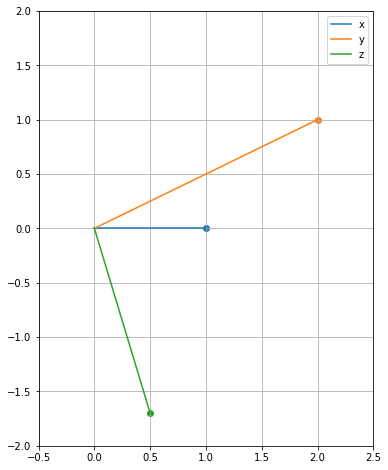

In [56]:
plt.figure(figsize=(6, 8))
plt.xlim((-0.5, 2.5))
plt.ylim((-2, 2))
plt.grid()
x, y, z = 1+0j, 2+1j, 0.5-1.7j
for k, v in {"x":x, "y":y, "z":z}.items():
    plt.plot([0, v.real], [0, v.imag], label=k)
    plt.scatter([v.real], [v.imag])
plt.legend()

## Fourier transform

Fourier transform transforms between time domain and frequency domain

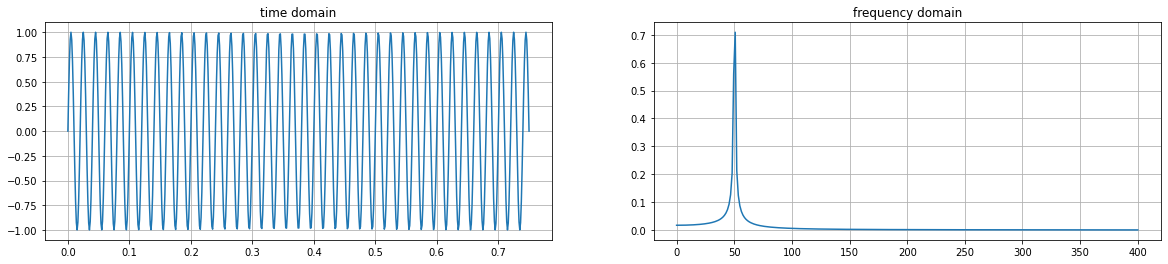

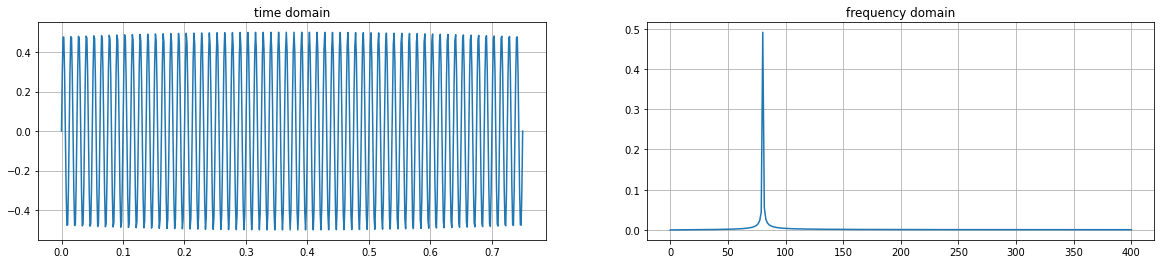

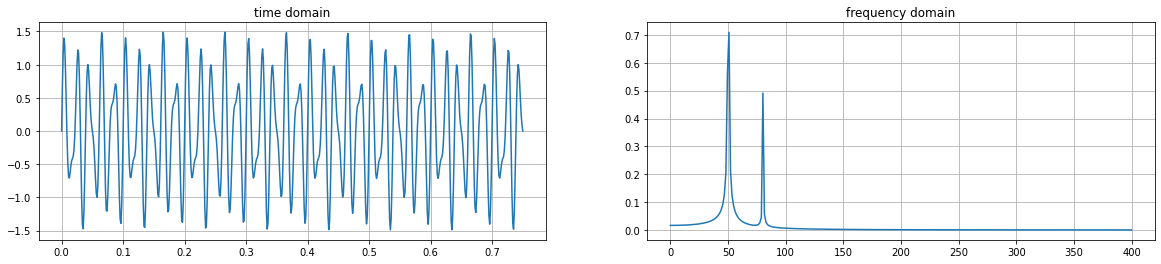

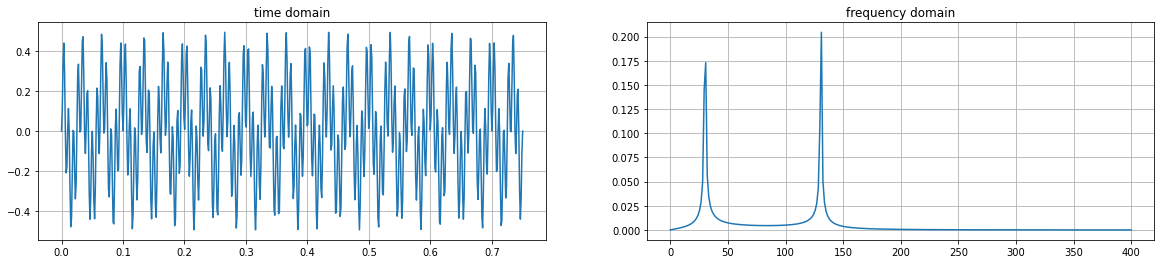

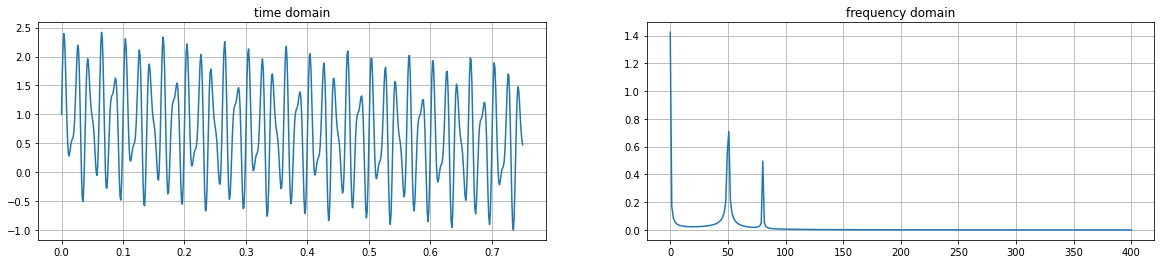

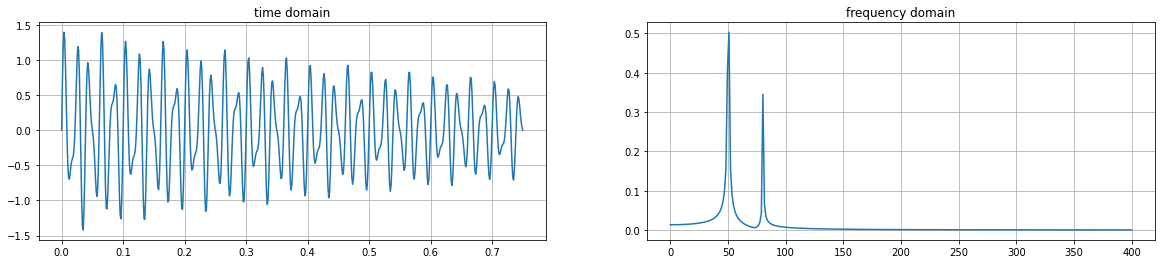

In [57]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = numpy.linspace(0.0, N*T, N)
y1 = numpy.sin(50.0 * 2.0*numpy.pi*x)
y2 = 0.5*numpy.sin(80.0 * 2.0*numpy.pi*x)
for y in [y1, y2, y1 + y2, y1*y2, numpy.exp(-x) + y1 + y2, numpy.exp(-x)*(y1 + y2)]:
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))
    ax[0].set_title("time domain")
    ax[0].plot(x, y)
    ax[0].grid()
    yf = fft(y)
    xf = numpy.linspace(0.0, 1.0/(2.0*T), N//2)
    ax[1].set_title("frequency domain")
    ax[1].plot(xf, 2.0/N * numpy.abs(yf[0:N//2]))
    ax[1].grid()
    plt.show()

## Application: image denoising

Text(0.5, 1.0, 'Original image')

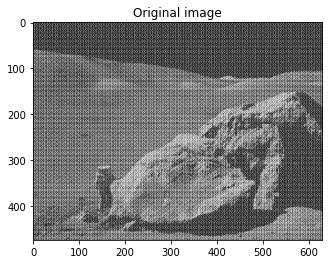

In [58]:
im = plt.imread('http://www.offtopia.net/macs-course/notebooks/moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [59]:
im

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.67843139, ..., 0.10196079, 0.29019609,
        0.        ],
       [0.72156864, 0.10980392, 0.60392159, ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.35294119],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]])

In [60]:
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(numpy.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

### Full spectrum

Text(0.5, 1.0, 'Fourier transform')

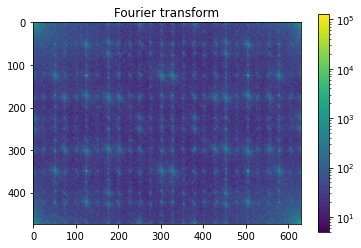

In [61]:
im_fft = fftpack.fft2(im)

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

### Filtered spectrum

To denoise the image, we remove intermediate frequencies, keeping only a few low frequencies and a few high frequencies.

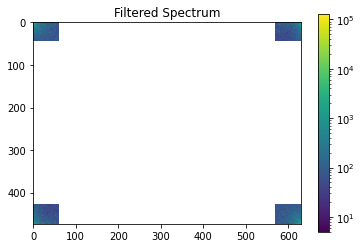

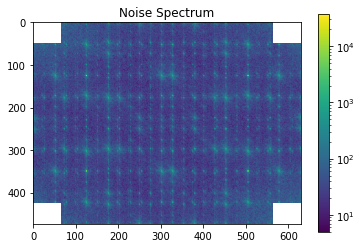

In [62]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()
im_fft_noise = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction)), ] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# Opposite for the noise
im_fft_noise[:int(r*keep_fraction), int(c*(1-keep_fraction)):] = 0
im_fft_noise[:int(r*keep_fraction), :int(c*keep_fraction)] = 0
im_fft_noise[int(r*(1-keep_fraction)):, int(c*(1-keep_fraction)):] = 0
im_fft_noise[int(r*(1-keep_fraction)):, :int(c*keep_fraction)] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')
plt.show()

plt.figure()
plot_spectrum(im_fft_noise)
plt.title('Noise Spectrum')
plt.show()

### Reconstructed image

Text(0.5, 1.0, 'Reconstructed Image')

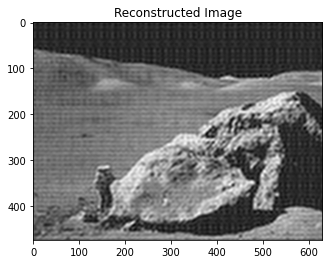

In [63]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

### Removed noise#

Text(0.5, 1.0, 'Noise')

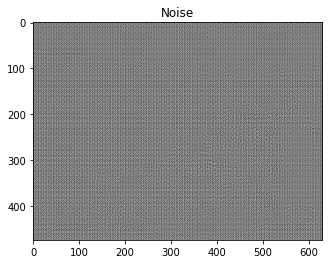

In [64]:
im_noise = fftpack.ifft2(im_fft_noise).real

plt.figure()
plt.imshow(im_noise, plt.cm.gray)
plt.title('Noise')

### Superimposed image and noise, again

Text(0.5, 1.0, 'Original Image, Recovered')

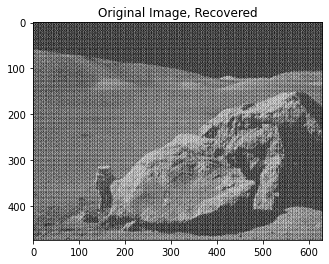

In [65]:
im_orig = fftpack.ifft2(im_fft2 + im_fft_noise).real

plt.figure()
plt.imshow(im_orig, plt.cm.gray)
plt.title('Original Image, Recovered')